In [72]:
import numpy as np
import time
from copy import deepcopy
import time

In [2]:


def board_to_string(board, N):
    return "\n".join(board[i:i+N] for i in range(0, len(board), N))

def get_board_list (board, N):
    return [[j for j in board[i:i+N]] for i in range(0, len(board), N)]

def string_to_board(board):
    return "".join(["".join(i) for i in board])


# Check if a row,col index pair is on the map
def valid_index(pos,N):
        return 0 <= pos[0] < N  and 0 <= pos[1] < N

def get_piece_positions(board):
    positions = {}

    for i in range(len(board)):
        for j in range(len(board)):
            if board[i][j] != '.':
                if board[i][j] not in positions.keys():
                    positions[board[i][j]] = [(i,j)]
                else:
                    positions[board[i][j]].append((i,j))
    return positions


In [96]:
N = 8
player = 'w'
timelimit = 10
board = '........W.W.W.W..w.w.w.w................b.b.b.b..B.B.B.B........'
board2 = '........W.W.W.W..w.w.w.w..b.............b.b...b..B.B.B.B........'
board3 = '........W.W.W.W..w...w.w..w......B......b.b.b.b....B.B.B........'
a = get_board_list(board, N)
b = get_board_list(board2, N)
c = get_board_list(board3, N)
print(board_to_string(string_to_board(c), 8))

........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


In [103]:
## Movement

def get_pichu_simple_moves(current_position, current_board, player):
    x = current_position[0]
    y = current_position[1]
    board = current_board.copy()
    if player == 'w':
    ## Possible moves (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)
        moves = ((x+1, y-1), (x+1, y+1))
    else:
    ## Possible moves (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)
        moves = ((x-1, y-1), (x-1, y+1))
    

    return [[current_position, move] for move in moves if valid_index(move, len(current_board)) and (board[move[0]][move[1]] in "." )]

def get_pichu_capture_moves(current_position, current_board, player):
    x = current_position[0]
    y = current_position[1]
    board = current_board.copy()
    if player == 'w':
        opposition = 'b'
        moves = ((x+2, y-2), (x+2, y+2))
        check_spots = ((x+1, y-1), (x+1, y+1))
        capture_moves = [[current_position, move] for move in zip(moves,check_spots) if valid_index(move[0], len(current_board))
         and (board[move[0][0]][move[0][1]] in "." ) and (board[move[1][0]][move[1][1]] == opposition)]
    else:
        opposition = 'w'
        moves = ((x-2, y-2), (x-2, y+2))
        check_spots = ((x-1, y-1), (x-1, y+1))
        capture_moves = [[current_position, move] for move in zip(moves,check_spots) if valid_index(move[0], len(current_board))
         and (board[move[0][0]][move[0][1]] in "." ) and (board[move[1][0]][move[1][1]] == opposition)]
    return capture_moves

def get_pikachu_simple_moves(current_position, current_board, player):
    x = current_position[0]
    y = current_position[1]
    board = current_board.copy()

    if player == 'w':
        moves = ((x, y-1), (x, y+1), (x+1, y), (x, y-2), (x, y+2), (x+2, y))
        checkspots = ((), (), (), (x, y-1), (x, y+1), (x+1, y))
        
    else:
        moves = ((x, y-1), (x, y+1), (x-1, y), (x, y-2), (x, y+2), (x-2, y))
        checkspots = ((), (), (), (x, y-1), (x, y+1), (x-1, y))

    valid_moves = []
    for move in zip(moves,checkspots):
        # print(move)
        if valid_index(move[0], len(current_board)) and (board[move[0][0]][move[0][1]] in "." ):
            
            if len(move[1]) ==0:
                # print(len(move[1]))
                valid_moves.append([current_position, move[0]])
            elif board[move[1][0]][move[1][1]] == '.':
                valid_moves.append([current_position, move[0]])
    return valid_moves
                    
def get_pikachu_capture_moves(current_position, current_board, player):
    # print("current : ", current_position)
    x = current_position[0]
    y = current_position[1]
    board = current_board.copy()
    # Single moves

    if player == 'w':
        opposition = 'bB'
        moves = ((x, y-2), (x, y+2), (x+2, y), (x, y-3), (x, y+3), (x+3, y))
        capture_spots = ((x, y-1), (x, y+1), (x+1, y), (x, y-2), (x, y+2), (x+2, y))
        empty_spots = ((), (), (), (x, y-1), (x, y+1), (x+1, y))
        
    else:
        opposition = 'wW'
        moves = ((x, y-2), (x, y+2), (x-2, y), (x, y-3), (x, y+3), (x-3, y))
        capture_spots = ((x, y-1), (x, y+1), (x-1, y), (x, y-2), (x, y+2), (x-2, y))
        empty_spots = ((), (), (), (x, y-1), (x, y+1), (x-1, y))
    # print("moves : ", moves)
    # print(list(zip(moves,checkspots)))
    valid_moves = []
    for move in zip(moves,empty_spots, capture_spots):
        # print(len(move[1]))
        if valid_index(move[0], len(current_board)) and (board[move[0][0]][move[0][1]] in "." ):
            
            if len(move[1]) == 0 and board[move[2][0]][move[2][1]] in opposition:
                valid_moves.append([current_position, (move[0], move[2])])
            elif len(move[1]) != 0 and board[move[1][0]][move[1][1]] == '.'and board[move[2][0]][move[2][1]] in opposition:

                valid_moves.append([current_position, (move[0], move[2])])
    # print(valid_moves)
    return valid_moves


    









def change_turn(current_player):
    return 'b' if current_player == 'w' else 'w'

def hieuristic_score(board):
    white_Pikachu_count = board.count('W')
    white_Pichu_count = board.count('w')
    white_Raichu_count = board.count('@')

    white_score = white_Pichu_count + 3*white_Pikachu_count + 5*white_Raichu_count

    black_Pikachu_count = board.count('B')
    black_Pichu_count = board.count('b')
    black_Raichu_count = board.count('$')

    black_score = black_Pichu_count + 3*black_Pikachu_count + 5*black_Raichu_count

    return white_score -  black_score
        
def successors(current_board, player):
    positions = get_piece_positions(current_board)
    pichu_current_positions = positions[player]
    pikachu_current_positions = positions[player.upper()]
    # print(positions)

    pichu_simpler_moves = [get_pichu_simple_moves(m, current_board, player) for m in pichu_current_positions]
    pichu_simpler_moves = [item for sublist in pichu_simpler_moves for item in sublist]
    pichu_capture_moves = [get_pichu_capture_moves(m, current_board, player) for m in pichu_current_positions]
    pichu_capture_moves = [item for sublist in pichu_capture_moves for item in sublist]

    pikachu_simpler_moves = [get_pikachu_simple_moves(m, current_board, player) for m in pikachu_current_positions]
    pikachu_simpler_moves = [item for sublist in pikachu_simpler_moves for item in sublist]
    pikachu_capture_moves = [get_pikachu_capture_moves(m, current_board, player) for m in pikachu_current_positions]
    pikachu_capture_moves = [item for sublist in pikachu_capture_moves for item in sublist]


    # print(pikachu_simpler_moves)
    successor_boards = []
    for m in pichu_simpler_moves:

        temp = deepcopy(current_board)
        temp[m[0][0]][m[0][1]] = '.'
        temp[m[1][0]][m[1][1]] = player
        # score = hieuristic_score(string_to_board(temp))


        successor_boards.append((temp, m))
    
    for m in pichu_capture_moves:
        # print(m)
        temp = deepcopy(current_board)
        temp[m[0][0]][m[0][1]] = '.'
        temp[m[1][0][0]][m[1][0][1]] = player
        temp[m[1][1][0]][m[1][1][1]] = '.'
        # score = hieuristic_score(string_to_board(temp))

        successor_boards.append((temp, (m[0], m[1][0])))
    
    for m in pikachu_simpler_moves:

        temp = deepcopy(current_board)
        temp[m[0][0]][m[0][1]] = '.'
        temp[m[1][0]][m[1][1]] = player.upper()
        # score = hieuristic_score(string_to_board(temp))

        successor_boards.append((temp, m))

    for m in pikachu_capture_moves:
        # print(m)
        temp = deepcopy(current_board)
        temp[m[0][0]][m[0][1]] = '.'
        temp[m[1][0][0]][m[1][0][1]] = player.upper()
        temp[m[1][1][0]][m[1][1][1]] = '.'
        # score = hieuristic_score(string_to_board(temp))

        successor_boards.append((temp, (m[0], m[1][0])))    

    return successor_boards








In [104]:
for m in successors(c, 'b'):
    print("Starting positions")
    # print("\n")
    print(board_to_string(string_to_board(c), 8))
    print("\n")
    print("New positions")
    print(board_to_string(string_to_board(m[0]), 8))
    print("You should move : ", m[1][0] , " to ", m[1][1])
    print("\n")
    print("*"*20)
    print("\n")

Starting positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


New positions
........
W.W.W.W.
.w...w.w
..w.....
.B.b....
b...b.b.
...B.B.B
........
You should move :  (5, 2)  to  (4, 3)


********************


Starting positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


New positions
........
W.W.W.W.
.w...w.w
..w.....
.B.b....
b.b...b.
...B.B.B
........
You should move :  (5, 4)  to  (4, 3)


********************


Starting positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


New positions
........
W.W.W.W.
.w...w.w
..w.....
.B...b..
b.b...b.
...B.B.B
........
You should move :  (5, 4)  to  (4, 5)


********************


Starting positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


New positions
........
W.W.W.W.
.w...w.w
..w.....
.B...b..
b.b.b...
...B.B.B
........
You should move :  (5, 6)  to  (4, 5)


********************


Starting positions
........
W.W.

In [105]:
def winner(board):
    if board.count('b') + board.count('B') + board.count('$') == 0:
        return "white"
    elif board.count('w') + board.count('W') + board.count('@') == 0:
        return "black"
    
    return None 

def minimax(current_board, depth, max_player):
    # print("current depth : ", depth)
    temp_board = deepcopy(current_board)
    # print("Parent positions")
    # # print("\n")
    # print(board_to_string(string_to_board(temp_board), 8))
    # print("\n")

    if depth == 0 or winner(string_to_board(temp_board)) != None:
        # print("Children positions - - black Turn")
        # # print("\n")
        # print(board_to_string(string_to_board(temp_board), 8))
        # print("\n")

        return hieuristic_score(string_to_board(temp_board)), temp_board
    
    if max_player:
        maxEval = float('-inf')
        best_board = None
        for child_board in successors(temp_board, 'w'):
            # print("Children positions - White Turn")
            # # print("\n")
            # print(board_to_string(string_to_board(child_board[0]), 8))
            # print("\n")

            evaluation = minimax(child_board[0], depth-1, False)[0]
            # print("Result at depth : ", evaluation)

            maxEval = max(maxEval, evaluation)
            if maxEval == evaluation:
                best_board = child_board
        
        return maxEval, best_board
    else:
        minEval = float('inf')
        best_board = None
        for child_board in successors(temp_board, 'b'):
            # print("Children positions - - black Turn")
            # # print("\n")
            # print(board_to_string(string_to_board(child_board[0]), 8))
            # print("\n")

            evaluation = minimax(child_board[0], depth-1, True)[0]
            # print("Result at depth : ", evaluation)
            minEval = min(minEval, evaluation)
            if minEval == evaluation:
                best_board = child_board
        
        return minEval, best_board

In [106]:
N = 8
board3 = '........W.W.W.W..w...w.w..w......B......b.b.b.b....B.B.B........'
print("Root Node positions")
# print("\n")
print(board_to_string(board3, 8))
print("\n")

Root Node positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........




In [110]:
board10 = get_board_list(board3, N)
answer = minimax(board10, 5, True)

print(board_to_string(string_to_board(answer[1][0]), 8))
print("Best move : From ", answer[1][1][0], " to ", answer[1][1][1])
print("Cost of moving :", answer[0])

........
W.W.W...
.w...w.w
..w...W.
.B......
b.b.b.b.
...B.B.B
........
Best move : From  (1, 6)  to  (3, 6)
Cost of moving : 0


In [ ]:
# Alpha Beta Pruning

#Alpha-beta-decision
#Reference : http://aima.cs.berkeley.edu/python/games.html
def alphabeta_search(current_board, d=4, cutoff_test=None, eval_fn=None):
    """Search game to determine best action; use alpha-beta pruning.
    This version cuts off search and uses an evaluation function."""

    # player = game.to_move(state)

    def max_value(state, current_board, beta, depth):
        if cutoff_test(state, depth):
            return eval_fn(state)
        v = -infinity
        for (a, s) in game.successors(state):
            v = max(v, min_value(s, alpha, beta, depth+1))
            if v >= beta:
                return v
            alpha = max(alpha, v)
        return v

    def min_value(state, alpha, beta, depth):
        if cutoff_test(state, depth):
            return eval_fn(state)
        v = infinity
        for (a, s) in game.successors(state):
            v = min(v, max_value(s, alpha, beta, depth+1))
            if v <= alpha:
                return v
            beta = min(beta, v)
        return v

In [78]:
## Possible main code
N = 8
board3 = '........W.W.W.W..w...w.w..w......B......b.b.b.b....B.B.B........'
time_limit = 10
end_time = time.time()+float(time_limit)
max_depth = 1
print("Root Node positions")
# print("\n")
print(board_to_string(board3, 8))
print("\n")

if len(board3)!=N*N:
    print ("The board does not have correct tiles..")
    print ("#tiles=",len(board3))
else:
    board10 = get_board_list(board3, N)
    display (board10)
    print ("Welcome to Raichu move recommender")
    print ("Fetching the next best move for your board...")
    print ("Best move for now is :")

    for depth in range(2,10):
        if(time.time()>=end_time):
            break
        max_depth = depth
        recommended_board = minimax(board10, depth, True)[1][0]

        if winner(recommended_board) == 'white':
            print ("We won!!!")
            next_board = string_to_board(recommended_board)
            print (board_to_string(next_board, N))
            break
        next_board = string_to_board(recommended_board)
        print (board_to_string(next_board, N))

Root Node positions
........
W.W.W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........




[['.', '.', '.', '.', '.', '.', '.', '.'],
 ['W', '.', 'W', '.', 'W', '.', 'W', '.'],
 ['.', 'w', '.', '.', '.', 'w', '.', 'w'],
 ['.', '.', 'w', '.', '.', '.', '.', '.'],
 ['.', 'B', '.', '.', '.', '.', '.', '.'],
 ['b', '.', 'b', '.', 'b', '.', 'b', '.'],
 ['.', '.', '.', 'B', '.', 'B', '.', 'B'],
 ['.', '.', '.', '.', '.', '.', '.', '.']]

Welcome to Raichu move recommender
Fetching the next best move for your board...
Best move for now is :
We won!!!
........
WW..W.W.
.w...w.w
..w.....
.B......
b.b.b.b.
...B.B.B
........


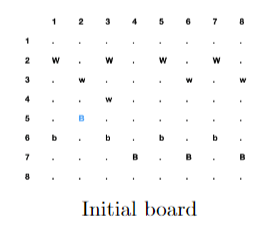

In [ ]:
def find_best_move(board, N, player, timelimit):
    # This sample code just returns the same board over and over again (which
    # isn't a valid move anyway.) Replace this with your code!
    #
    # while True:
        # time.sleep(1)
        # yield board
    return 2

In [4]:
N = 8
player = 'w'
timelimit = 10
board = '........W.W.W.W..w.w.w.w................b.b.b.b..B.B.B.B........'


In [ ]:
print(board_to_string(board, N))

........
W.W.W.W.
.w.w.w.w
........
........
b.b.b.b.
.B.B.B.B
........


In [ ]:
piecemovements = {}
piecemovements['W'] = 

In [62]:
N = 8
player = 'w'
timelimit = 10
board = '........W.W.W.W..w.w.w.w................b.b.b.b..B.B.B.B........'
def get_board_list (board, N):
    return [[j for j in board[i:i+N]] for i in range(0, len(board), N)]

a = get_board_list(board, N)

In [ ]:
a


[['.', '.', '.', '.', '.', '.', '.', '.'],
 ['W', '.', 'W', '.', 'W', '.', 'W', '.'],
 ['.', 'w', '.', 'w', '.', 'w', '.', 'w'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.'],
 ['b', '.', 'b', '.', 'b', '.', 'b', '.'],
 ['.', 'B', '.', 'B', '.', 'B', '.', 'B'],
 ['.', '.', '.', '.', '.', '.', '.', '.']]

In [ ]:
positions = {}

for i in range(len(a)):
    for j in range(len(a)):
        if a[i][j] != '.':
            if a[i][j] not in positions.keys():
                positions[a[i][j]] = [(i,j)]
            else:
                positions[a[i][j]].append((i,j))



            

In [ ]:
positions

{'B': [(6, 1), (6, 3), (6, 5), (6, 7)],
 'W': [(1, 0), (1, 2), (1, 4), (1, 6)],
 'b': [(5, 0), (5, 2), (5, 4), (5, 6)],
 'w': [(2, 1), (2, 3), (2, 5), (2, 7)]}